Importing Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le

%matplotlib inline

Files Uploading

In [151]:
from google.colab import files
uploaded = files.upload()

Saving first inten project.csv to first inten project (3).csv


Pandas

In [197]:
data = pd.read_csv("first inten project.csv")
print(data.head())

  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   

Feature extraction

In [198]:
data['total family members'] = data['number of adults'] + data['number of children']    #total family members
data['total number of days'] = data['number of weekend nights'] + data['number of week nights']   #total days reserved

Check for duplicates

In [199]:
sum(data.duplicated(subset="Booking_ID"))

0

Feature selection

In [200]:
data.drop('Booking_ID', axis=1, inplace=True)   #booking_ID is unique so not needed by ML

Check data types

In [201]:
print(data.dtypes)

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
total family members          int64
total number of days          int64
dtype: object


In [206]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status', 'total family members', 'total number of days'],
      dtype='object')


In [211]:
# label encoding on booking status
status_mapping = {'Not_Canceled':1, 'Canceled':0}
data['booking status'] = data['booking status'].map(status_mapping)

# one hot encoding for 'meal types'
meal_dummies = pd.get_dummies(data['type of meal'], drop_first=False)

# one hot encoding for 'room type'
room_dummies = pd.get_dummies(data['room type'], drop_first=False)

# one hot encoding for 'market segment type'
market_segment_dummies = pd.get_dummies(data['market segment type'], drop_first=False)

#concatinating the dummies with the original data and dropping the old columns
data = pd.concat([data, meal_dummies, room_dummies, market_segment_dummies], axis=1)


print(data.dtypes)

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status                int64
total family members          int64
total number of days          int64
Meal Plan 1                    bool
Meal Plan 2                    bool
Meal Plan 3                    bool
Not Selected                   bool
Room_Type 1                    bool
Room_Type 2                    bool
Room_Type 3                    bool
Room_Type 4                    bool
Room_Type 5                    bool
Room_Type 6                 

Sort data

In [212]:
data.sort_values(by='date of reservation', ascending=False)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online
26105,2,0,1,2,Meal Plan 1,0,Room_Type 1,198,Offline,0,...,False,False,False,False,False,False,False,False,True,False
24074,2,0,1,2,Meal Plan 1,0,Room_Type 1,198,Offline,0,...,False,False,False,False,False,False,False,False,True,False
20231,2,0,0,2,Not Selected,0,Room_Type 1,51,Online,0,...,False,False,False,False,False,False,False,False,False,True
35076,3,0,1,2,Meal Plan 1,0,Room_Type 4,68,Online,0,...,False,True,False,False,False,False,False,False,False,True
26242,2,0,2,2,Not Selected,1,Room_Type 1,40,Online,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,2,1,1,2,Meal Plan 1,1,Room_Type 2,18,Online,0,...,False,False,False,False,False,False,False,False,False,True
13274,2,0,0,2,Meal Plan 1,0,Room_Type 1,11,Offline,0,...,False,False,False,False,False,False,False,False,True,False
30460,2,0,2,5,Meal Plan 1,0,Room_Type 1,91,Offline,0,...,False,False,False,False,False,False,False,False,True,False
13713,2,0,0,2,Meal Plan 1,0,Room_Type 1,46,Online,0,...,False,False,False,False,False,False,False,False,False,True


check for null values

In [213]:
print(data.isnull().sum())

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
total family members        0
total number of days        0
Meal Plan 1                 0
Meal Plan 2                 0
Meal Plan 3                 0
Not Selected                0
Room_Type 1                 0
Room_Type 2                 0
Room_Type 3                 0
Room_Type 4                 0
Room_Type 5                 0
Room_Type 6                 0
Room_Type 7                 0
Aviation                    0
Complementary               0
Corporate                   0
Offline                     0
Online    

check for outliers

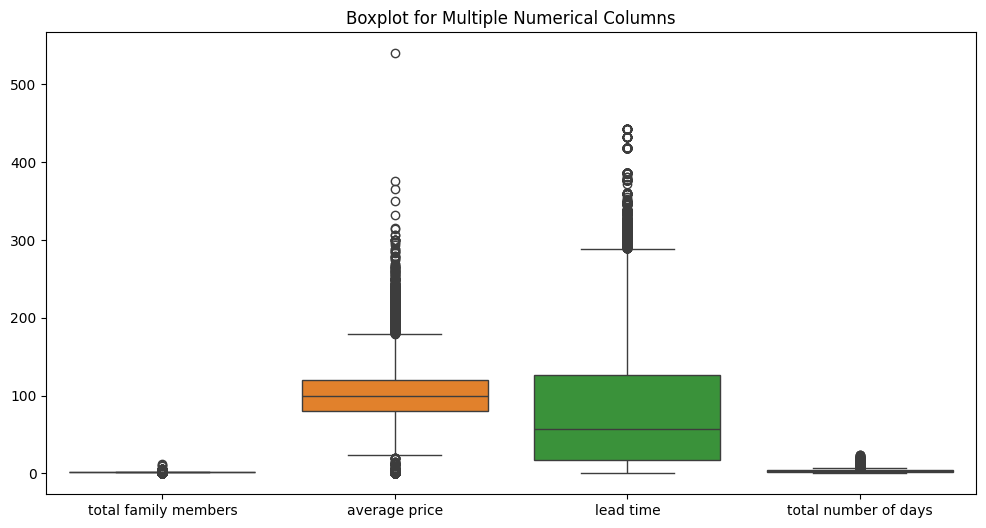

In [214]:
numerical_columns = ['total family members', 'average price', 'lead time', 'total number of days']
plt.figure(figsize=(12,6))
sns.boxplot(data=data[numerical_columns])

plt.title('Boxplot for Multiple Numerical Columns')
plt.show()

handling outliers

In [162]:
'''
# define function to remove outliers
def remove_outliers(df , column_name):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  IQR = q3 -q1 # interquartile range

  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound) ]
  return df_cleaned
'''

In [168]:
'''
data = remove_outliers(data, 'total family members')
data = remove_outliers(data, 'total number of days')
data = remove_outliers(data, 'lead time')
data = remove_outliers(data, 'average price')
'''

Data Visualization

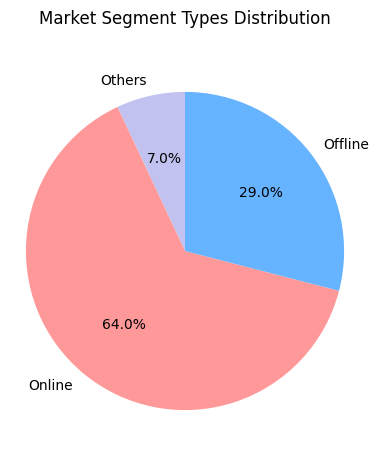

In [215]:
segment_sums = data.sum()

# Group certain segments into 'Others'
others_sum = segment_sums[['Aviation', 'Complementary', 'Corporate']].sum()
online = segment_sums['Online']
offline = segment_sums['Offline']

# Create a new Series for the pie chart
new_data = pd.Series([others_sum, online, offline], index=['Others', 'Online', 'Offline'])

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
colors = ['#c2c2f0', '#ff9999', '#66b3ff']  # Adjust colors as needed
new_data.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Ensure the pie chart is a circle
plt.title('Market Segment Types Distribution', pad=20)
plt.show()

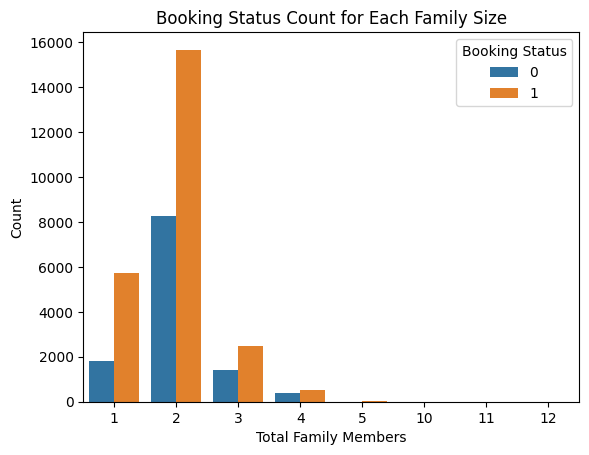

In [216]:
sns.countplot(x='total family members', hue='booking status', data=data)

# Add labels and title
plt.title('Booking Status Count for Each Family Size')
plt.xlabel('Total Family Members')
plt.ylabel('Count')
plt.legend(title='Booking Status')  # Adds a legend for booking status categories
plt.show()

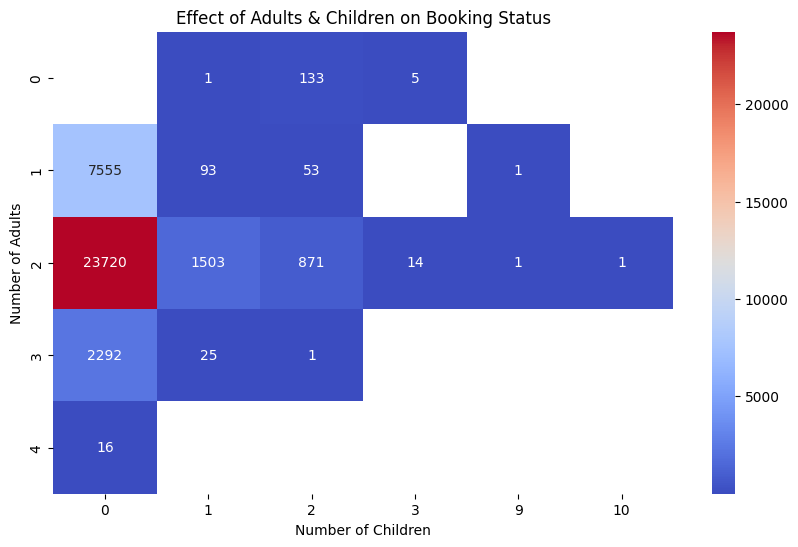

In [217]:
# Count the number of occurrences of each (adults, children, booking status) combination
pivot_table = data.pivot_table(index='number of adults', columns='number of children', values='booking status', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f')

# Labels
plt.title('Effect of Adults & Children on Booking Status')
plt.xlabel('Number of Children')
plt.ylabel('Number of Adults')

plt.show()


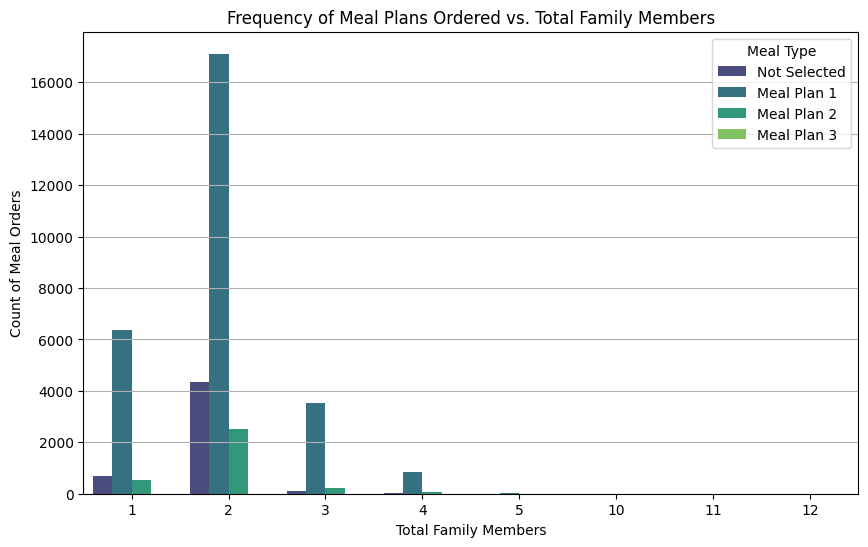

In [221]:
# Create a new column for total family members
data['total family members'] = data['number of adults'] + data['number of children']

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=data['total family members'], hue=data['type of meal'], palette='viridis')

# Labels and title
plt.title('Frequency of Meal Plans Ordered vs. Total Family Members')
plt.xlabel('Total Family Members')
plt.ylabel('Count of Meal Orders')
plt.legend(title='Meal Type')
plt.grid(axis='y')

plt.show()


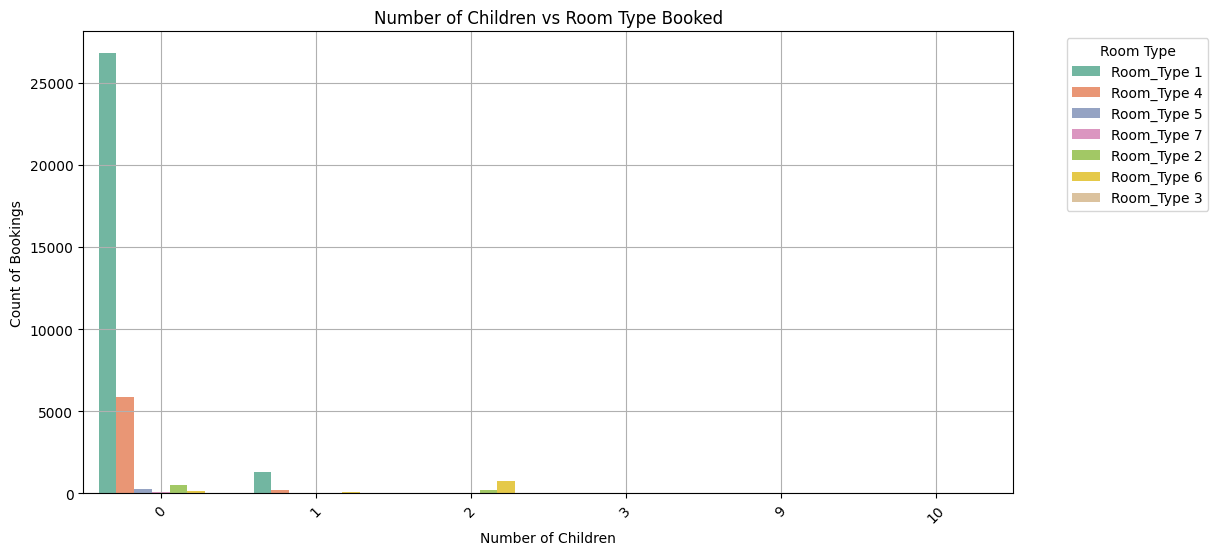

In [230]:
# Create a count plot for number of children vs room type
plt.figure(figsize=(12, 6))

# We will count the bookings, using 'number of children' for the x-axis and 'room type' for the hue
sns.countplot(data=data, x='number of children', hue='room type', palette='Set2')

# Title and labels
plt.title('Number of Children vs Room Type Booked')
plt.xlabel('Number of Children')
plt.ylabel('Count of Bookings')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


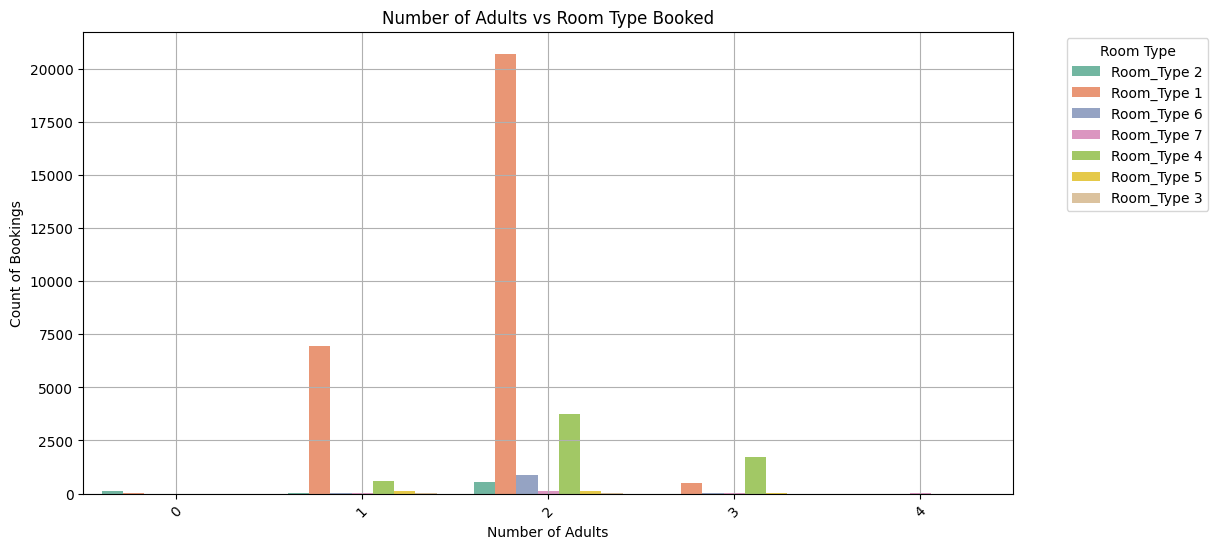

In [231]:
# Create a count plot for number of adults vs room type
plt.figure(figsize=(12, 6))

# We will count the bookings, using 'number of adults' for the x-axis and 'room type' for the hue
sns.countplot(data=data, x='number of adults', hue='room type', palette='Set2')

# Title and labels
plt.title('Number of Adults vs Room Type Booked')
plt.xlabel('Number of Adults')
plt.ylabel('Count of Bookings')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
